##Connect Google Drive

Connect with Google Drive to import the dataset.

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/cw1

/content/drive/My Drive/cw1


In [ ]:
ls

AmesHousing.csv


##Import Libraries and Read CSV File

Required python libraries are imported to perform the exploratory analysis.



*   Pandas and Numpy will be used to perform data cleansing and exploratory analysis.
*   Matplotlib and Seaborn will be used to create interactive data visualizations. 





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Display and Review the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/cw1/AmesHousing.csv")
display(dataset)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

##Data Cleaning

Data cleaning is the process of preparing and fixing datasets by modifying or removing incorrect, duplicate or incomplete data. We will perform the following checks to ensure our data is fit for exploration and does not adverseraly influence our analysis.



*   Data Type Check
*   Duplication Check
*   Completeness Check
*   Inconsistency Check



###1. Data-Type Check

All variables are converted to the correct data types to ensure data is represented correctly.

In [ ]:
dataset['Lot Area'] = dataset['Lot Area'].astype(float)
dataset['1st Flr SF'] = dataset['1st Flr SF'].astype(float)
dataset['2nd Flr SF'] = dataset['2nd Flr SF'].astype(float)
dataset['Low Qual Fin SF'] = dataset['Low Qual Fin SF'].astype(float)
dataset['Gr Liv Area'] = dataset['Gr Liv Area'].astype(float)
dataset['Wood Deck SF'] = dataset['Wood Deck SF'].astype(float)
dataset['Open Porch SF'] = dataset['Open Porch SF'].astype(float)
dataset['Pool Area'] = dataset['Pool Area'].astype(float)
dataset['Misc Val'] = dataset['Misc Val'].astype(float)
dataset['SalePrice'] = dataset['SalePrice'].astype(float)

Verify if the variables are converted to the correct datatypes.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   float64
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

###2. Duplication Check


PID is a unique **"Parcel Identifier"** assigned to each house in Ames. We will implement a duplication check to ensure each record in the dataset is unique and their is no duplication.

In [ ]:
dataset['PID'].is_unique

True

###3. Completeness Check

To ensure our analysis is accurate and consistent, we will identify features that have null values and imputate them with substitute values as and when required.

In [ ]:
Null_Count = dataset.isnull().sum()
NullValues = Null_Count[Null_Count>0].sort_values(ascending=False)

display(NullValues)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Yr Blt      159
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Area          1
Electrical           1
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

We have checked the percentage of null values in each column to ensure datasets are dropped accordingly.

In [ ]:
Null_Value_Percentage = 100*(dataset.isna().sum()/len(dataset)).sort_values(ascending=False)
display(Null_Value_Percentage[Null_Value_Percentage>0])

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Cond          2.730375
Bsmt Qual          2.730375
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Garage Area        0.034130
Garage Cars        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Electrical         0.034130
dtype: float64

Identify all features that have more than 80% null values to determine if the columns need to be dropped.

In [ ]:
display(Null_Value_Percentage[Null_Value_Percentage>50])

Pool QC         99.556314
Misc Feature    96.382253
Alley           93.242321
Fence           80.477816
dtype: float64

Since we have multiple features with more than 80% null values; we will review the dataset before dropping columns.

In [ ]:
display(dataset)

After reviewing the dataset and the text descriptions, it can be seen that in each of these 4 columns, "NA" is used as a seperate category to describe the feature in each column. Therefore, instead of dropping these columns we will replace all "NA" values with the relevant descriptions from the data documentation.

In [ ]:
dataset['Pool QC'].fillna('No Pool', inplace = True)  #NA is equivalent to "No Pool" as described in the data documentation

dataset['Misc Feature'].fillna('None', inplace = True) #NA is equivalent to "None" as described in the data documentation

dataset['Alley'].fillna('No alley access', inplace = True) #NA is equivalent to "No Alley Access" as described in the data documentation

dataset['Fence'].fillna('No Fence', inplace = True) #NA is equivalent to "No Fence" as described in the data documentation

All the features with less than 80% null values will either be replaced with relevant data or rows can be dropped if the elimination does not influence the performance of the dataset. We grouped together all co-related features and reviewed the dataset to determine if null values should be replaced or data rows should be dropped.

The data documentation shows that all NA values in "Fireplace Qual" column means that their is no fireplace in the propertly, therefore, we replaced the null values under this feature with "No Fireplace".

In [ ]:
dataset['Fireplace Qu'].fillna('No Fireplace', inplace = True) #NA is equivalent to "No Fireplace" as described in the data documentation

Lot frontage is the front area of the property that is connected to the street. Assuming that properties in same neighborhood might've similar lot frontage, we replaced the null values against each property with the average lot frontage of the properties in that particular neighborhood.

In [ ]:
dataset['Lot Frontage']=dataset.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
dataset['Lot Frontage']=dataset['Lot Frontage'].fillna(0)

Results in cell 31 show that all columns that depict information related to the garage have same percentage of null values, therefore, we reviewed the dataset to check if missing values were co-related. It was observed that all rows that had null values either did not have a garage with the property or the garage was detached, therefore, it was described as "NA" or "Garage Yr Blt" was left blank.

To fix that, all the objective null values were replaced with relevant descriptions as prescribed in the data documentation and null values in the "Garage Yr Blt" column were replaced with "0". We also changed the data type for "Garage Yr Built" from Float to Integer, since years cannot be represent a float value.

In [ ]:
dataset['Garage Finish'].fillna('No Garage', inplace = True) #NA is equivalent to "No Garage" as described in the data documentation
dataset['Garage Qual'].fillna('No Garage', inplace = True)   #NA is equivalent to "No Garage" as described in the data documentation
dataset['Garage Cond'].fillna('No Garage', inplace = True)   #NA is equivalent to "No Garage" as described in the data documentation
dataset['Garage Type'].fillna('No Garage', inplace = True)   #NA is equivalent to "No Garage" as described in the data documentation
dataset['Garage Yr Blt']=dataset['Garage Yr Blt'].fillna(0)
dataset['Garage Yr Blt'] = dataset['Garage Yr Blt'].astype(int) #Data Type is changed from float to int as we cannot store years in float

Similarly, we grouped together all the features relevant to the basement of the property and reviewed the dataset and the data documentation. All objective features have been replaced with descriptions prescibed in the data documentation and null values in numerical features have been replaced with "0".

In [ ]:
dataset['Bsmt Exposure'].fillna('No Basement', inplace = True)   #NA is equivalent to "No Basement" as described in the data documentation
dataset['BsmtFin Type 2'].fillna('No Basement', inplace = True)  #NA is equivalent to "No Basement" as described in the data documentation
dataset['Bsmt Qual'].fillna('No Basement', inplace = True)       #NA is equivalent to "No Basement" as described in the data documentation
dataset['Bsmt Cond'].fillna('No Basement', inplace = True)       #NA is equivalent to "No Basement" as described in the data documentation
dataset['BsmtFin Type 1'].fillna('No Basement', inplace = True)  #NA is equivalent to "No Basement" as described in the data documentation
dataset['Bsmt Full Bath']=dataset['Bsmt Full Bath'].fillna(0)
dataset['Bsmt Half Bath']=dataset['Bsmt Half Bath'].fillna(0)
dataset['BsmtFin SF 1']=dataset['BsmtFin SF 1'].fillna(0)
dataset['BsmtFin SF 2']=dataset['BsmtFin SF 2'].fillna(0)
dataset['Total Bsmt SF']=dataset['Total Bsmt SF'].fillna(0)
dataset['Bsmt Unf SF']=dataset['Bsmt Unf SF'].fillna(0)

We now have the following features with null values in them.

In [ ]:
Null_Value_Percentage = 100*(dataset.isna().sum()/len(dataset)).sort_values(ascending=False)
display(Null_Value_Percentage[Null_Value_Percentage>0])

Mas Vnr Area    0.784983
Mas Vnr Type    0.784983
Garage Cars     0.034130
Electrical      0.034130
Garage Area     0.034130
dtype: float64

The results in the above cell show that both "Mas Vnr Type" and "Mas Vnr Area" have the same percentage of null values. 

We will review the dataset to identify if the null-values are for same properties.

In [ ]:
dataset[dataset['Mas Vnr Type'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,56,528240070,60,RL,74.207207,7851.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,...,Y,SBrkr,860.0,1100.0,0.0,1960.0,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002,Fin,2.0,440.0,TA,TA,Y,288.0,48.0,0,0,0,0.0,No Pool,No Fence,None,0.0,5,2010,WD,Normal,216500.0
484,485,528275160,60,RL,74.207207,12891.0,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,...,Y,SBrkr,878.0,1126.0,0.0,2004.0,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002,Fin,3.0,644.0,TA,TA,Y,0.0,48.0,0,0,0,0.0,No Pool,No Fence,None,0.0,7,2009,WD,Normal,257500.0
517,518,528458020,20,FV,90.000000,7993.0,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,...,Y,SBrkr,1436.0,0.0,0.0,1436.0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2008,Fin,2.0,529.0,TA,TA,Y,0.0,121.0,0,0,0,0.0,No Pool,No Fence,None,0.0,10,2009,New,Partial,225000.0
538,539,531371050,20,RL,67.000000,10083.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,...,Y,SBrkr,1200.0,0.0,0.0,1200.0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,2003,RFn,2.0,555.0,TA,TA,Y,0.0,41.0,0,0,0,0.0,No Pool,No Fence,None,0.0,8,2009,WD,Normal,184900.0
867,868,907260030,60,RL,70.000000,8749.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,...,Y,SBrkr,840.0,885.0,0.0,1725.0,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2002,RFn,2.0,550.0,TA,TA,Y,0.0,48.0,0,0,0,0.0,No Pool,No Fence,None,0.0,11,2009,WD,Normal,198500.0
1095,1096,528290090,60,RL,74.207207,7750.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,...,Y,SBrkr,707.0,707.0,0.0,1414.0,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002,Fin,2.0,403.0,TA,TA,Y,100.0,35.0,0,0,0,0.0,No Pool,No Fence,None,0.0,4,2008,WD,Normal,176000.0
1119,1120,528439010,20,RL,87.000000,10037.0,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,...,Y,SBrkr,1460.0,0.0,0.0,1460.0,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006,Fin,2.0,480.0,TA,TA,Y,0.0,20.0,0,0,0,0.0,No Pool,No Fence,None,0.0,8,2008,WD,Normal,247000.0
1122,1123,528462040,20,FV,95.000000,11639.0,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,...,Y,SBrkr,1428.0,0.0,0.0,1428.0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,

In [ ]:
dataset[dataset['Mas Vnr Area'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,56,528240070,60,RL,74.207207,7851.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,...,Y,SBrkr,860.0,1100.0,0.0,1960.0,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002,Fin,2.0,440.0,TA,TA,Y,288.0,48.0,0,0,0,0.0,No Pool,No Fence,None,0.0,5,2010,WD,Normal,216500.0
484,485,528275160,60,RL,74.207207,12891.0,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,...,Y,SBrkr,878.0,1126.0,0.0,2004.0,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002,Fin,3.0,644.0,TA,TA,Y,0.0,48.0,0,0,0,0.0,No Pool,No Fence,None,0.0,7,2009,WD,Normal,257500.0
517,518,528458020,20,FV,90.000000,7993.0,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,...,Y,SBrkr,1436.0,0.0,0.0,1436.0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2008,Fin,2.0,529.0,TA,TA,Y,0.0,121.0,0,0,0,0.0,No Pool,No Fence,None,0.0,10,2009,New,Partial,225000.0
538,539,531371050,20,RL,67.000000,10083.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,...,Y,SBrkr,1200.0,0.0,0.0,1200.0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,2003,RFn,2.0,555.0,TA,TA,Y,0.0,41.0,0,0,0,0.0,No Pool,No Fence,None,0.0,8,2009,WD,Normal,184900.0
867,868,907260030,60,RL,70.000000,8749.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,...,Y,SBrkr,840.0,885.0,0.0,1725.0,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2002,RFn,2.0,550.0,TA,TA,Y,0.0,48.0,0,0,0,0.0,No Pool,No Fence,None,0.0,11,2009,WD,Normal,198500.0
1095,1096,528290090,60,RL,74.207207,7750.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,...,Y,SBrkr,707.0,707.0,0.0,1414.0,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002,Fin,2.0,403.0,TA,TA,Y,100.0,35.0,0,0,0,0.0,No Pool,No Fence,None,0.0,4,2008,WD,Normal,176000.0
1119,1120,528439010,20,RL,87.000000,10037.0,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,...,Y,SBrkr,1460.0,0.0,0.0,1460.0,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006,Fin,2.0,480.0,TA,TA,Y,0.0,20.0,0,0,0,0.0,No Pool,No Fence,None,0.0,8,2008,WD,Normal,247000.0
1122,1123,528462040,20,FV,95.000000,11639.0,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,...,Y,SBrkr,1428.0,0.0,0.0,1428.0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,

The results suggest that both columns have null values against same properties, therefore, after looking at the data documentation we will assume that these properties do not have a Masonry Veneer and therefore replace the null values in "Mas Vnr Type" with "None" and "Mas Vnr Area" with "0".

In [ ]:
dataset['Mas Vnr Type'].fillna('None', inplace = True)
dataset['Mas Vnr Area']=dataset['Mas Vnr Area'].fillna(0)

Since the remaining features have less than 0.1% of missing data, we have dropped rows that have null values in them.

In [ ]:
dataset= dataset.dropna(axis=0, subset=['Garage Area','Garage Cars','Electrical'])

We have now replaced or dropped all the null values in the dataset.

In [ ]:
Null_Value_Percentage = 100*(dataset.isna().sum()/len(dataset)).sort_values(ascending=False)
display(Null_Value_Percentage[Null_Value_Percentage>0])

Series([], dtype: float64)

###4. Correlation Analysis

The Ames Housing dataset contain 81 features that describe each property located in Ames. Our goal is to identify key features that have an impact on the sale price of the property and understand the market behaviour based on these features. To do so, we will perform a corelation analysis to identify top 10 features that influence the market price of the property.

In [ ]:
corelation = dataset.corr()['SalePrice'].sort_values(ascending=False)
print(corelation)

SalePrice          1.000000
Overall Qual       0.799306
Gr Liv Area        0.706927
Garage Cars        0.647908
Garage Area        0.640397
Total Bsmt SF      0.632673
1st Flr SF         0.621711
Year Built         0.558672
Full Bath          0.545879
Year Remod/Add     0.533295
Mas Vnr Area       0.502161
TotRms AbvGrd      0.495490
Fireplaces         0.474540
BsmtFin SF 1       0.433208
Lot Frontage       0.348447
Wood Deck SF       0.327259
Open Porch SF      0.312882
Half Bath          0.285140
Bsmt Full Bath     0.275742
2nd Flr SF         0.269685
Lot Area           0.266537
Garage Yr Blt      0.253709
Bsmt Unf SF        0.183233
Bedroom AbvGr      0.143952
Screen Porch       0.112105
Pool Area          0.068394
Mo Sold            0.035093
3Ssn Porch         0.032207
BsmtFin SF 2       0.005964
Misc Val          -0.015708
Yr Sold           -0.030640
Order             -0.031289
Bsmt Half Bath    -0.035864
Low Qual Fin SF   -0.037680
MS SubClass       -0.085031
Overall Cond      -0

We can see that the top 10 features which have the most impact on sale price are:



1.   Overall Qual
2.   Ground Liv Area
3.   Garage Cars
4.   Garage Area
5.   Total Bsmt SF
6.   1st Flr SF
7.   2nd Flr SF
8.   Year Built
9.   Full Bath
10.  Year Remod/Add





To ensure our dataset does not have any incorrect values or outliers, we will review the corelation of these top 10 features with sale price and drop the outliers if required.

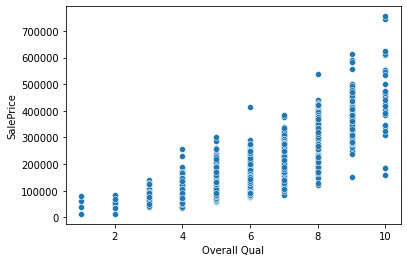

In [ ]:
sns.scatterplot(data=dataset , x='Overall Qual',y='SalePrice')

The scatter plot above shows that we have a few properties that have a quality of more than 8, however, the sale price is less than $200,000. There is a possibility that these values are incorrect, therefore we will drop them to ensure our data model is accurate.

In [ ]:
dataset[(dataset['Overall Qual']>8)&(dataset['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,72.0,24572.0,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,...,Y,SBrkr,1599.0,1345.0,0.0,2944.0,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977,RFn,3.0,864.0,TA,TA,Y,140.0,70.0,16,0,0,0.0,No Pool,No Fence,None,0.0,6,2008,WD,Family,150000.0
1498,1499,908154235,60,RL,313.0,63887.0,Pave,No alley access,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,...,Y,SBrkr,4692.0,950.0,0.0,5642.0,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2.0,1418.0,TA,TA,Y,214.0,292.0,0,0,0,480.0,Gd,No Fence,None,0.0,1,2008,New,Partial,160000.0
2180,2181,908154195,20,RL,128.0,39290.0,Pave,No alley access,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,...,Y,SBrkr,5095.0,0.0,0.0,5095.0,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008,Fin,3.0,1154.0,TA,TA,Y,546.0,484.0,0,0,0,0.0,No Pool,No Fence,Elev,17000.0,10,2007,New,Partial,183850.0
2181,2182,908154205,60,RL,130.0,40094.0,Pave,No alley access,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,...,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3.0,884.0,TA,TA,Y,208.0,406.0,0,0,0,0.0,No Pool,No Fence,None,0.0,10,2007,New,Partial,184750.0


In [ ]:
drop_outlier=dataset[(dataset['Overall Qual']>8)&(dataset['SalePrice']<200000)].index
dataset=dataset.drop(drop_outlier, axis=0)

Similarly, we have 2 properties that have a sale price abnormally high from the mean sale price of the dataset. Furthermore, the dataset shows both these properties are located in the same neighborhood and again, the sale prices of both these properties is abnormally high to the mean sale price in this neighborhood. Therefore, we have decided to drop these outliers from our dataset.

In [ ]:
dataset[(dataset['Overall Qual']>8)&(dataset['SalePrice']>700000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,1761,528320050,60,RL,160.0,15623.0,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,...,Y,SBrkr,2411.0,2065.0,0.0,4476.0,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3.0,813.0,TA,TA,Y,171.0,78.0,0,0,0,555.0,Ex,MnPrv,None,0.0,7,2007,WD,Abnorml,745000.0
1767,1768,528351010,60,RL,104.0,21535.0,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,...,Y,SBrkr,2444.0,1872.0,0.0,4316.0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3.0,832.0,TA,TA,Y,382.0,50.0,0,0,0,0.0,No Pool,No Fence,None,0.0,1,2007,WD,Normal,755000.0


In [ ]:
drop_outlier=dataset[(dataset['Overall Qual']>8)&(dataset['SalePrice']>700000)].index
dataset=dataset.drop(drop_outlier, axis=0)

Finally we had two properties with a abnormally high sale price against the quality and therefore both the property records were dropped from our data model as shown below:

In [ ]:
dataset[(dataset['Overall Qual']==8)&(dataset['SalePrice']>500000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47.0,53504.0,Pave,No alley access,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,...,Y,SBrkr,1690.0,1589.0,0.0,3279.0,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003,Fin,3.0,841.0,TA,TA,Y,503.0,36.0,0,0,210,0.0,No Pool,No Fence,None,0.0,6,2010,WD,Normal,538000.0


In [ ]:
drop_outlier=dataset[(dataset['Overall Qual']==8)&(dataset['SalePrice']>500000)].index
dataset=dataset.drop(drop_outlier, axis=0)

In [ ]:
dataset[(dataset['Overall Qual']==6)&(dataset['SalePrice']>400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2737,2738,905427030,75,RL,60.0,19800.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2.5Unf,6,8,1935,1990,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,425.0,Unf,0.0,1411.0,1836.0,...,Y,SBrkr,1836.0,1836.0,0.0,3672.0,0.0,0.0,3,1,5,1,Gd,7,Typ,2,Gd,Detchd,1993,Unf,2.0,836.0,TA,TA,Y,684.0,80.0,32,0,0,0.0,No Pool,No Fence,None,0.0,12,2006,WD,Normal,415000.0


In [ ]:
drop_outlier=dataset[(dataset['Overall Qual']==6)&(dataset['SalePrice']>400000)].index
dataset=dataset.drop(drop_outlier, axis=0)

The scatter plot now shows that we have successfully removed all the outliers in terms of overall quality and sale price.

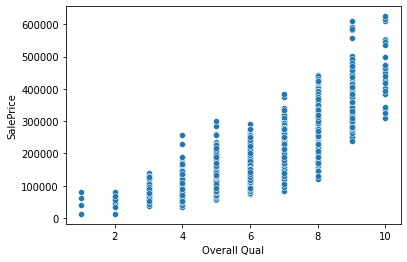

In [ ]:
sns.scatterplot(data=dataset , x='Overall Qual',y='SalePrice')

The below graph shows that most the values look evenly distributed, however, we can spot a outlier where the ground living area is greater than 3500 and the sale price is less then 300,000. Since the sale price seems to be abnormally low from the other houses with such a huge ground living area, we will drop this outlier.

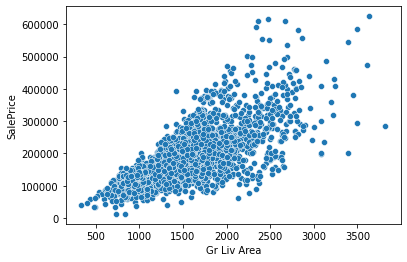

In [ ]:
sns.scatterplot(data=dataset , x='Gr Liv Area',y='SalePrice')

In [ ]:
dataset[(dataset['Gr Liv Area']>3500) & (dataset['SalePrice']<300000) ]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1497,1498,908154080,20,RL,123.0,47007.0,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,...,Y,SBrkr,3820.0,0.0,0.0,3820.0,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959,Unf,2.0,624.0,TA,TA,Y,0.0,372.0,0,0,0,0.0,No Pool,No Fence,None,0.0,7,2008,WD,Normal,284700.0


In [ ]:
drop_outlier=dataset[(dataset['Gr Liv Area']>3500) & (dataset['SalePrice']<300000) ].index
dataset=dataset.drop(drop_outlier, axis=0)

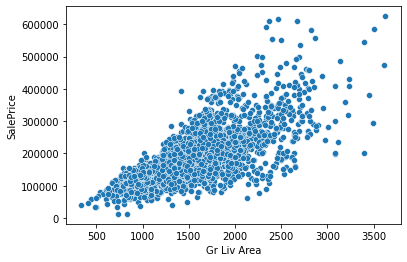

In [ ]:
sns.scatterplot(data=dataset , x='Gr Liv Area',y='SalePrice')

In the below graph, we can locate a property where the house has space for 5 cars, however, the sale price is less than 200,000. Since the trend shows that the higher the number of cars a garage can have in the house, the higher will be the price of the house. Since the price doesn't correspond to the trend, we will drop this record considering it as a outlier.

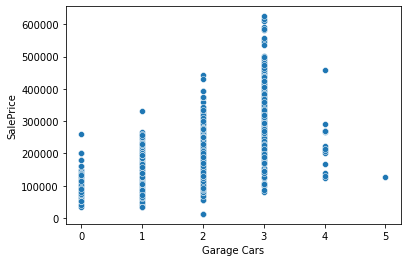

In [ ]:
sns.scatterplot(data=dataset , x='Garage Cars',y='SalePrice')

In [ ]:
dataset[(dataset['Garage Cars']>4) & (dataset['SalePrice']<200000) ]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
746,747,903236040,30,RM,50.0,8635.0,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1925,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,LwQ,134.0,Unf,0.0,938.0,1072.0,...,Y,SBrkr,1072.0,0.0,0.0,1072.0,1.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Detchd,1982,Unf,5.0,1184.0,Fa,TA,P,0.0,0.0,105,0,0,0.0,No Pool,No Fence,None,0.0,8,2009,WD,Normal,126500.0


In [ ]:
drop_outlier=dataset[(dataset['Garage Cars']>4) & (dataset['SalePrice']<200000) ].index
dataset=dataset.drop(drop_outlier, axis=0)

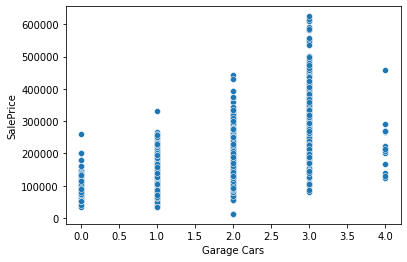

In [ ]:
sns.scatterplot(data=dataset , x='Garage Cars',y='SalePrice')

Similarly, we have reviewed each of the top 10 features and dropped the outliers accordingly.

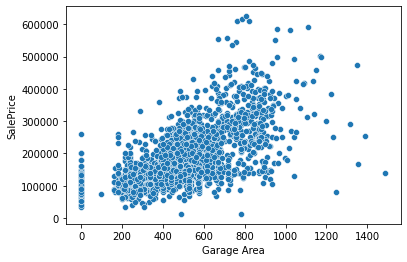

In [ ]:
sns.scatterplot(data=dataset , x='Garage Area',y='SalePrice')

In [ ]:
drop_outlier=dataset[(dataset['Garage Area']>1200) & (dataset['SalePrice']<200000) ].index
dataset=dataset.drop(drop_outlier, axis=0)

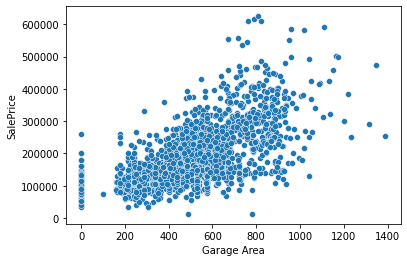

In [ ]:
sns.scatterplot(data=dataset , x='Garage Area',y='SalePrice')

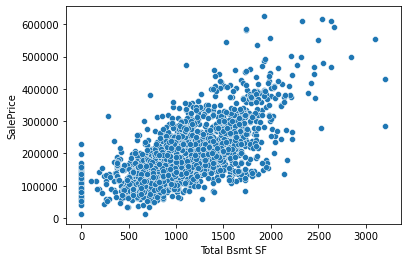

In [ ]:
sns.scatterplot(data=dataset , x='Total Bsmt SF',y='SalePrice')

In [ ]:
drop_outlier=dataset[(dataset['Total Bsmt SF']>3000) & (dataset['SalePrice']<500000) ].index
dataset=dataset.drop(drop_outlier, axis=0)

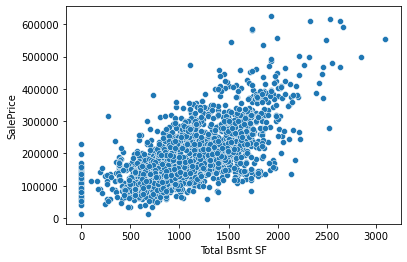

In [ ]:
sns.scatterplot(data=dataset , x='Total Bsmt SF',y='SalePrice')

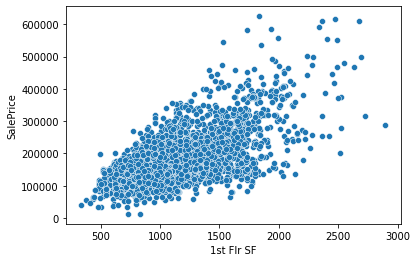

In [ ]:
sns.scatterplot(data=dataset , x='1st Flr SF',y='SalePrice')

In [ ]:
drop_outlier=dataset[(dataset['1st Flr SF']>2500) & (dataset['SalePrice']<300000) ].index
dataset=dataset.drop(drop_outlier, axis=0)

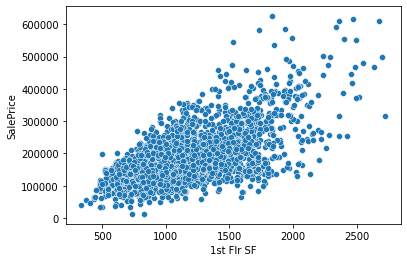

In [ ]:
sns.scatterplot(data=dataset , x='1st Flr SF',y='SalePrice')

In the below results, we can see that their is one property that is built before 1900, however, the sale price is abnormally high as compare to other properties built in the same years. We reviewed the property and since the property was remodified in 1993, the structure might be improved and the house might be worth the price. Considering that, we will not consider this record as an outlier.

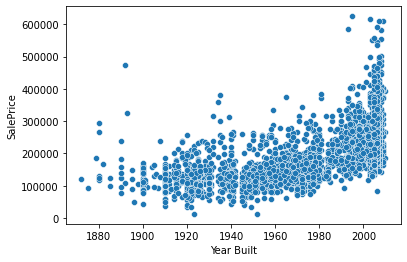

In [ ]:
sns.scatterplot(data=dataset , x='Year Built',y='SalePrice')

In [ ]:
dataset[(dataset['Year Built']<1900) & (dataset['SalePrice']>400000) ]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2666,2667,902400110,75,RM,90.0,22950.0,Pave,No alley access,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,...,Y,SBrkr,1518.0,1518.0,572.0,3608.0,0.0,0.0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3.0,840.0,Ex,TA,Y,0.0,260.0,0,0,410,0.0,No Pool,GdPrv,None,0.0,6,2006,WD,Normal,475000.0


##Exploratory Data Analysis (EDA)

We will now perform exploratory data analysis on our dataset to discover any direct or hidden patterns, relationship between variables or any anamalous events. For the course of this analysis, our target variable will be "SalePrice" and we will try to identify sale price trends and patterns against each of the features.

We have segregated the categorical and numerical variables in our dataset and have combined them into groups by assigning each of them a new variable. This will allow us to explore each kind of variable seperately.

In [ ]:
def categorical_groups():
    # Numerical Features
    numerical = dataset.select_dtypes(include=['int64','float64']).columns
    numerical = numerical.drop(['PID','SalePrice'])

    # Categorical Features
    categorical = dataset.select_dtypes(include=['object']).columns
    return list(numerical), list(categorical)

numerical, categorical = categorical_groups()

We have also categorized the top 10 features into a single list and will try to identify the corelation between these features through a heatmap.

In [ ]:
top10 = dataset[['Overall Qual','Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF','1st Flr SF','Year Built','Full Bath','Year Remod/Add']]

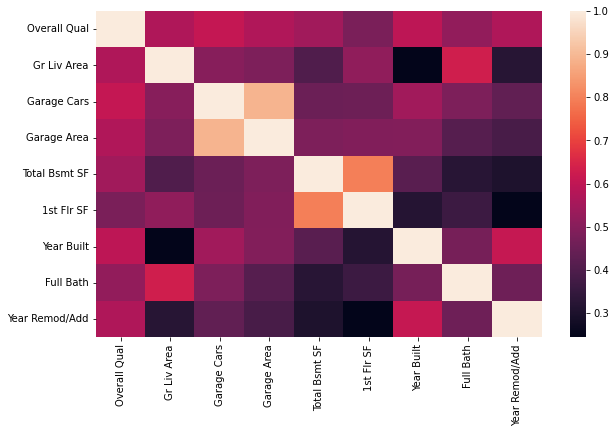

In [ ]:
corr = top10.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The above heatmap suggests that most of the top features that have a high correlation with the sale price, do not strongly correlate with each other. We can only see a few features that correlate with each other, such as number of garage cars corresponds with the garage area or total basement area is consistent with the 1st floor area. All the other features do not have a high correlation between each other.

###Statistical Overview

Cells below provide a brief statistical overview of the Ames Housing Dataset in terms of the sale price.

In [ ]:
rows, columns=dataset.shape
print("Number of Rows = ", rows)
print( "Number of Columns = ", columns)

Number of Rows =  2910
Number of Columns =  82


In [ ]:
Average_SalePrice = dataset.mean()['SalePrice']
print("Average Sale Price in Ames is",Average_SalePrice)

Average Sale Price in Ames is 180069.9735395189


In [ ]:
Minimum_SalePrice = dataset.min()['SalePrice']
print("Minimum Sale Price in Ames is", Minimum_SalePrice)

Minimum Sale Price in Ames is 12789.0


In [ ]:
Maximum_SalePrice = dataset.max()['SalePrice']
print("Maximum Sale Price in Ames is", Maximum_SalePrice)

Maximum Sale Price in Ames is 625000.0


###Sale Price Distribution Graph

The below graph shows that our dataset is positively skewed which means that most of the houes in the city of Ames are sold under the average price in this area. It also shows that our graph has a Leptokurtic distribution and the dataset has an abdundance of outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


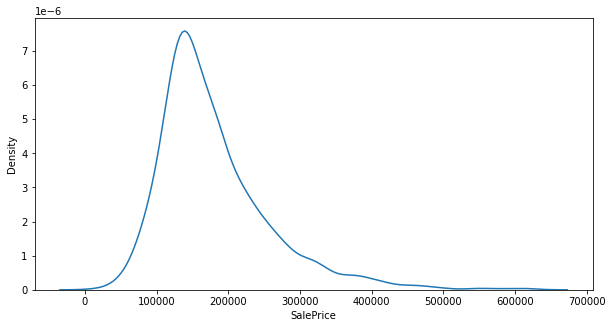

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['SalePrice'],hist=False)

In [ ]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
dataset.SalePrice.skew(), dataset.SalePrice.kurtosis()))

Skew: 1.585 | Kurtosis: 3.848


###Distribution of Numerical Features

The below visualization shows distribution of each of the numerical features in the dataset. Through these histograms, we can see which of the numerical features were most noticed in houses in Ames during 2006-10. 

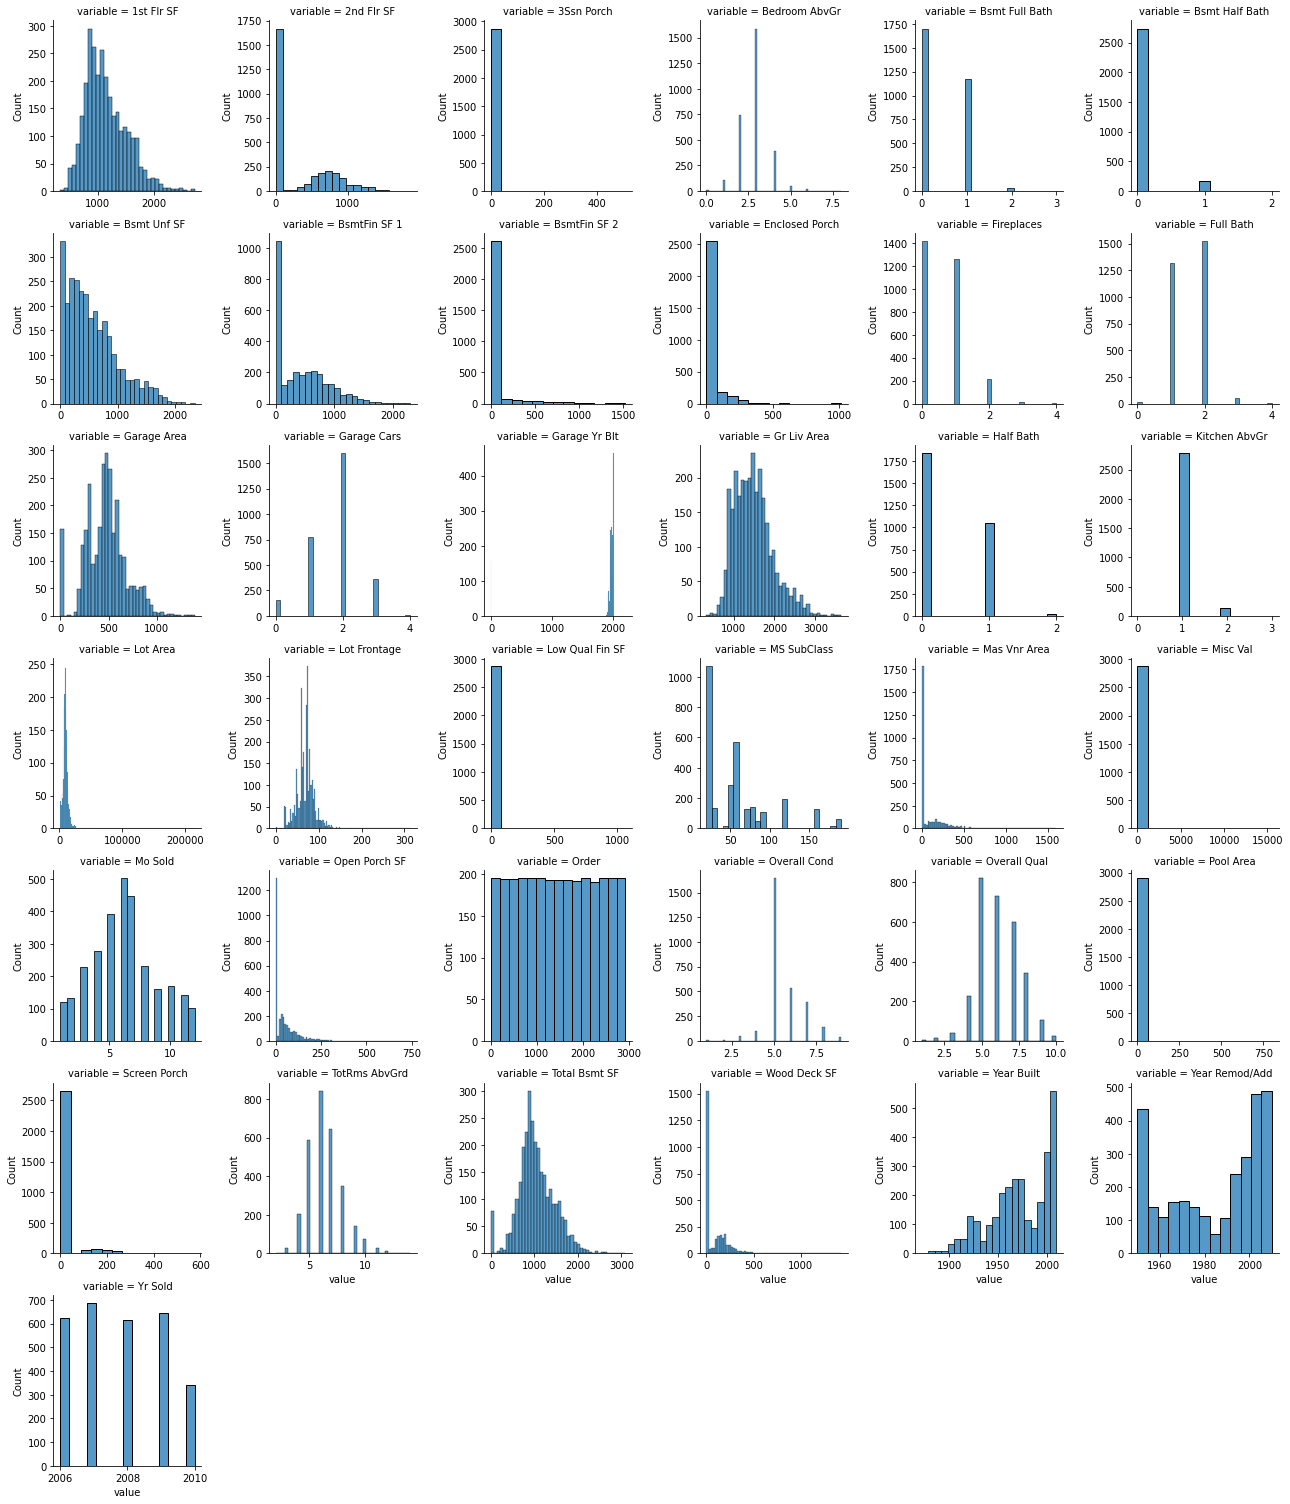

In [ ]:
f = pd.melt(dataset, value_vars=sorted(numerical))
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')

###Distribution of Categorical Features

The below visualization shows distribution of each of the categorical features in the dataset. Through these histograms, we can see which of the categorical features were most popular in Ames during 2006-10.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


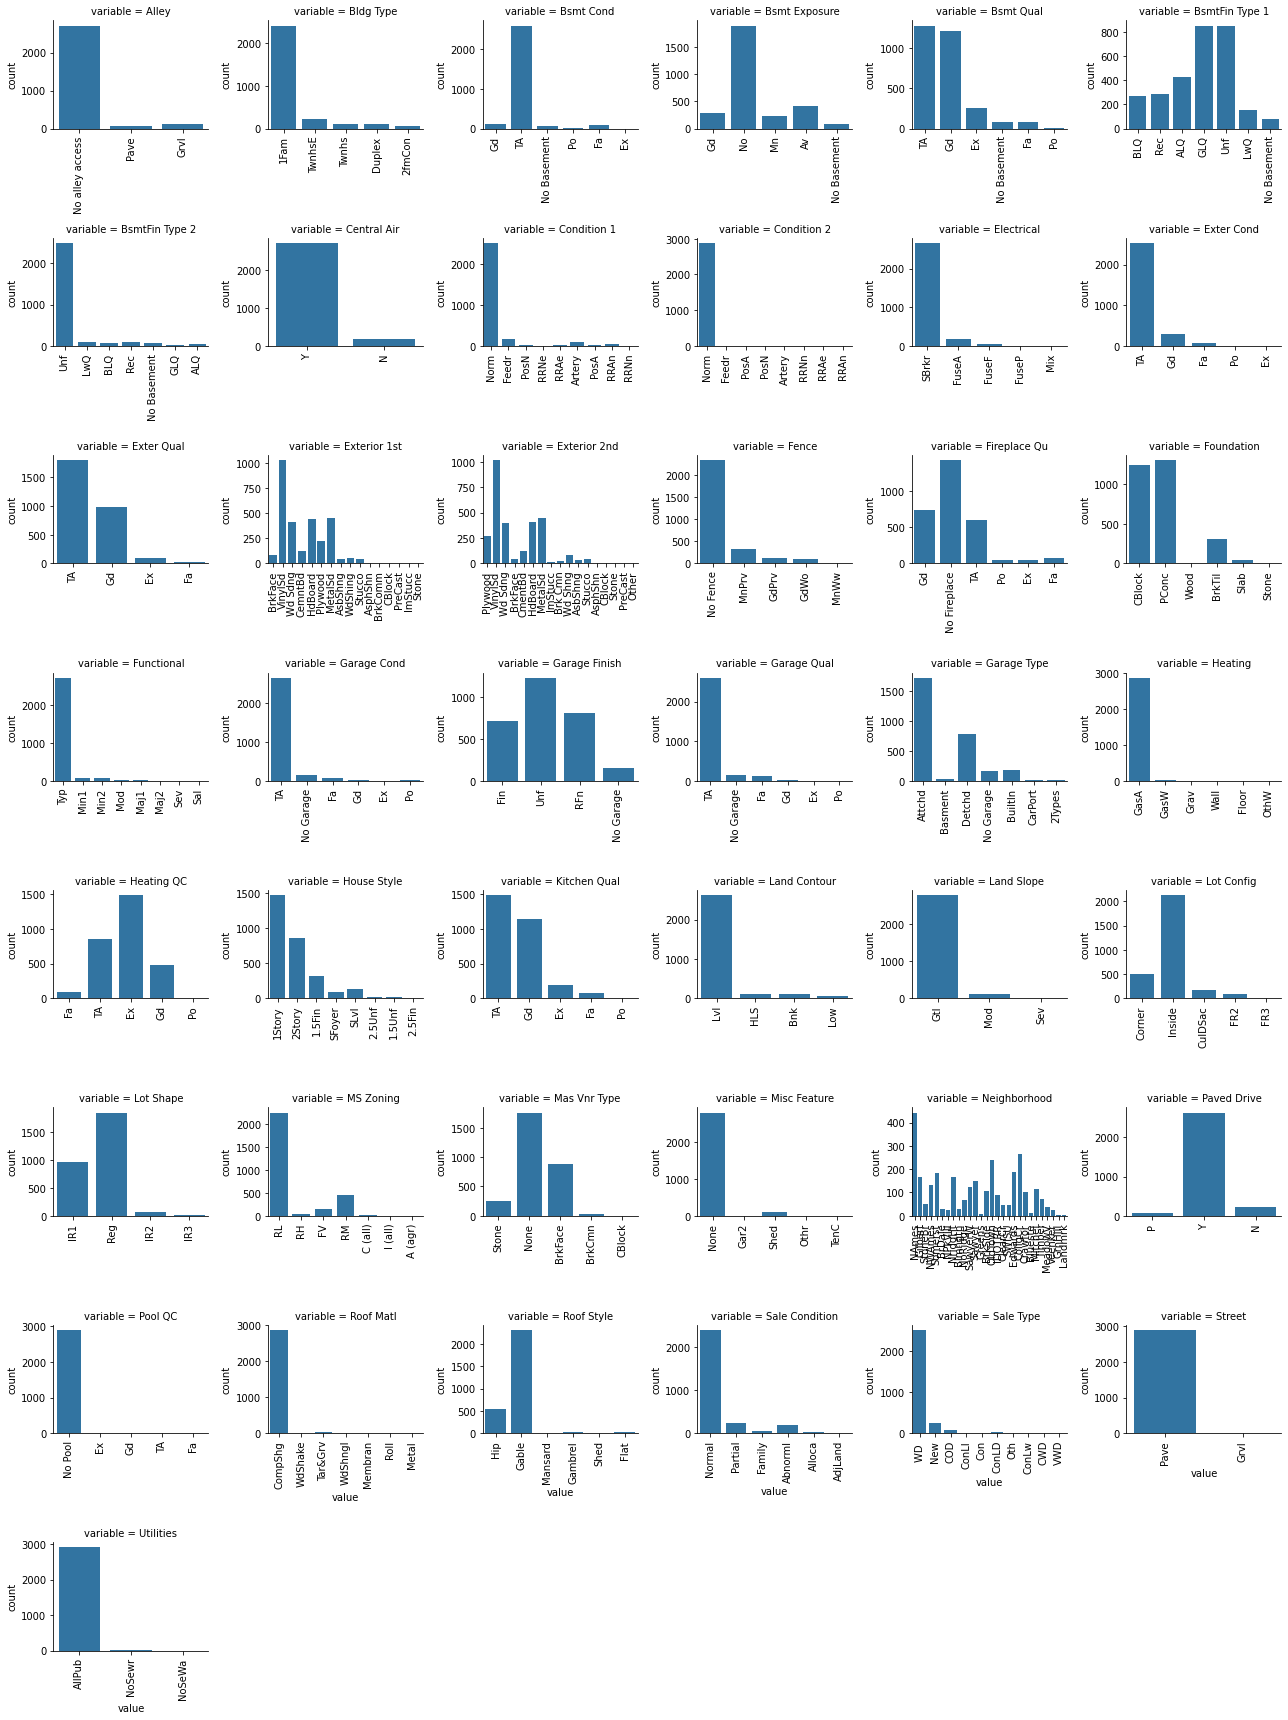

In [ ]:
f = pd.melt(dataset, value_vars=sorted(categorical))
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

###Number of Houses Sold in Each Neighborhood?

The graph below shows that most houses were sold in the neighborhood of "Names", and "GrnHill" and "Landmrk" had the least number sales between 2006-10.

Text(0.5, 1.0, 'Houses sold in each neighborhood')

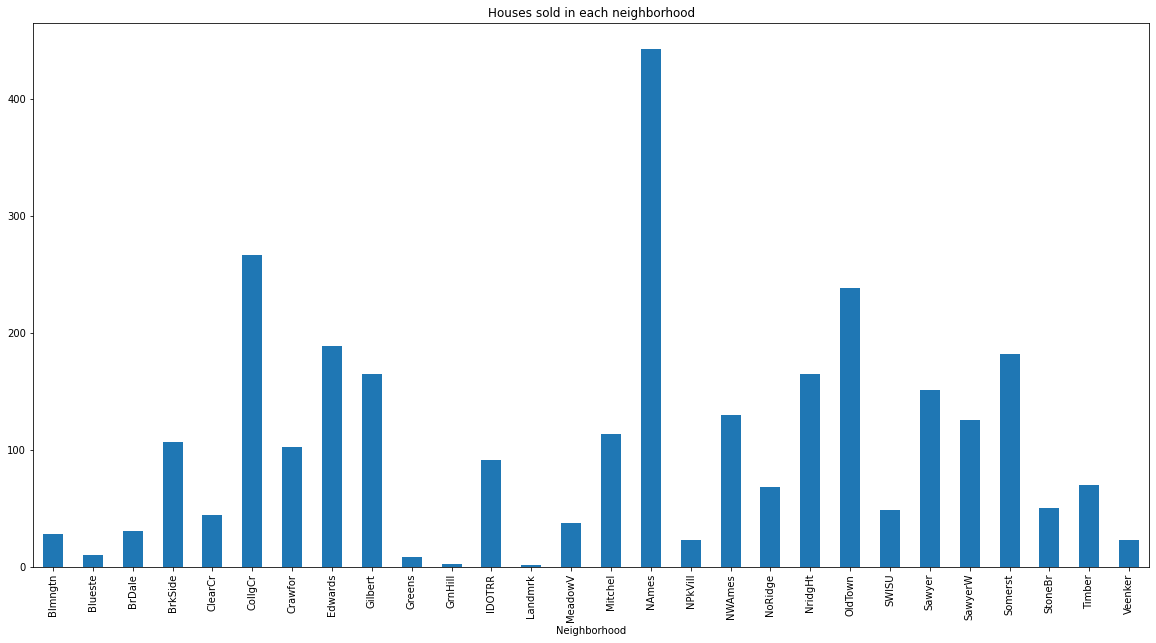

In [ ]:
dataset.groupby(['Neighborhood']).PID.count().plot(kind='bar', figsize=(20,10))
plt.title('Houses sold in each neighborhood')

###Average Sale Price against Each Categorical Feature

Since our target variable is "Sale Price", we will check the average sale price against all categorical features and identify the sale price pattern against the top 10 features identified in cell 26.

In [ ]:
def Category_SalePrice_Effect(dataset):
  for i in dataset:
    if dataset[i].dtype == 'O':
      print(dataset.groupby(i, as_index=True)['SalePrice'].mean() )  
      print("\n")
      
print(Category_SalePrice_Effect(dataset))

MS Zoning
A (agr)     47300.000000
C (all)     79744.833333
FV         218986.949640
I (all)     80312.500000
RH         136419.777778
RL         190344.152039
RM         126729.554348
Name: SalePrice, dtype: float64


Street
Grvl    108996.363636
Pave    180339.656088
Name: SalePrice, dtype: float64


Alley
Grvl               123427.134454
No alley access    182644.325839
Pave               176945.358974
Name: SalePrice, dtype: float64


Lot Shape
IR1    209485.027864
IR2    225476.200000
IR3    226051.000000
Reg    162458.752566
Name: SalePrice, dtype: float64


Land Contour
Bnk    143927.078947
HLS    251537.336134
Low    197309.724138
Lvl    178014.138603
Name: SalePrice, dtype: float64


Utilities
AllPub    180149.122119
NoSeWa    137500.000000
NoSewr     86312.500000
Name: SalePrice, dtype: float64


Lot Config
Corner     177536.479290
CulDSac    224333.971751
FR2        174122.894118
FR3        196635.857143
Inside     177119.025388
Name: SalePrice, dtype: float64


Land Slope
G

###How the top 10 features impact the sale price?

The below visualization gives us the following information:



*   Houses that had a high quality were sold at a higher price.
*   Most houses that were sold in Ames had a overall quality of 6 or less.



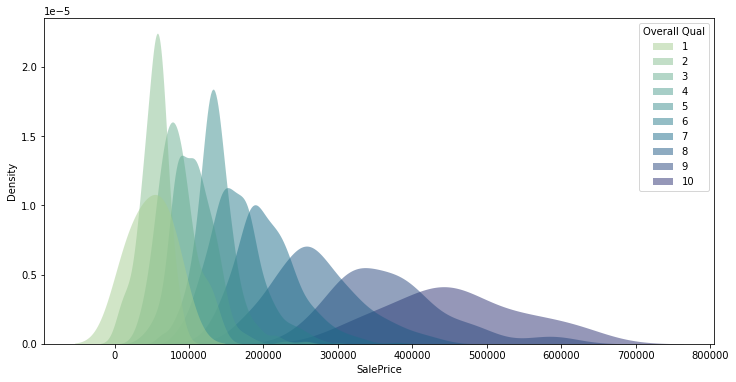

In [ ]:
plt.figure(figsize=(12,6))

sns.kdeplot(
   data=dataset, x="SalePrice", hue="Overall Qual",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

The SalePrice/Gr Liv Area graph shows that houses that had a larger ground living area were more expensive then the ones that had very little living area on the ground floor.

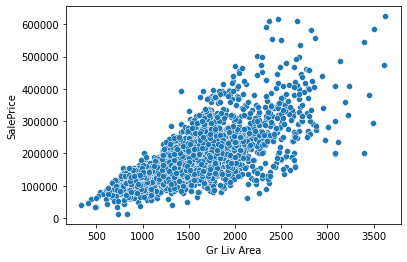

In [ ]:
sns.scatterplot(x=dataset['Gr Liv Area'], y=dataset['SalePrice']);

The below graph shows that houses that had atleast space for 3 cars were sold at a higher price, whereas most of the houses in Ames have atleast spaces for 2 cars in the Garages.

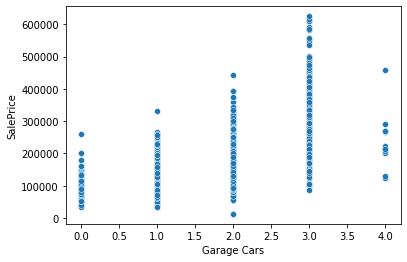

In [ ]:
sns.scatterplot(x=dataset['Garage Cars'], y=dataset['SalePrice']);

The SalePrice/Garage Area graph shows that houses that had no garage were sold at low prices as compare to the houses that had a garage in them. Similarly, it can be seen that houses that had a larger garage were sold at a higher price.

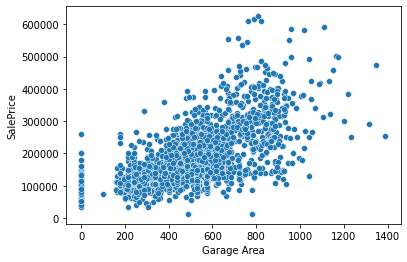

In [ ]:
sns.scatterplot(x=dataset['Garage Area'], y=dataset['SalePrice']);

The SalePrice/Garage Area graph shows that houses that had no basement were sold at low prices as compare to the houses that had a basement in them. Similarly, it can be seen that houses that had a larger basement were expensive then the ones that had a small basement.

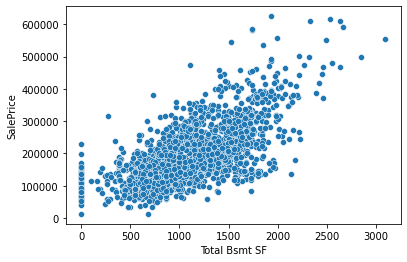

In [ ]:
sns.scatterplot(x=dataset['Total Bsmt SF'], y=dataset['SalePrice']);

The trend in the below graph shows that houses that have a larger area on the first floor have higher sale prices.

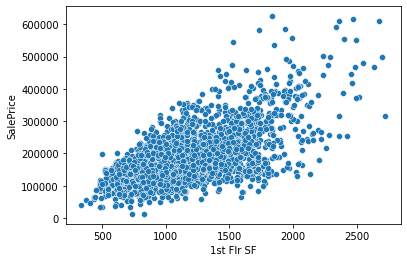

In [ ]:
sns.scatterplot(x=dataset['1st Flr SF'], y=dataset['SalePrice']);

The below graph shows that houses "Year Built" does not have much of an effect on the sale price and the graph is evenly distributed. Nonetheless, houses built after 2000 were sold at a higher price.

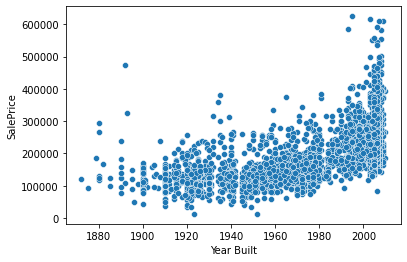

In [ ]:
sns.scatterplot(x=dataset['Year Built'], y=dataset['SalePrice']);

The box below shows that most of the houses in Ames have atleast 1 or more full baths in the house and houses that have atleast 2 or more house baths tend to be sold at a higher price.

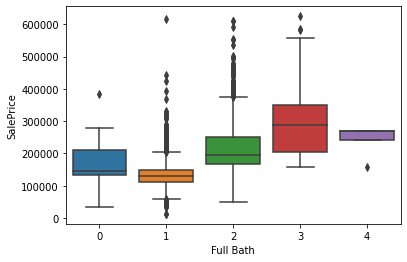

In [ ]:
sns.boxplot(x=dataset['Full Bath'], y=dataset['SalePrice']);

Houses that were re-modified in recent years before sale were sold at a higher price as compare to the houses that were not modified or modified many years before the sale.

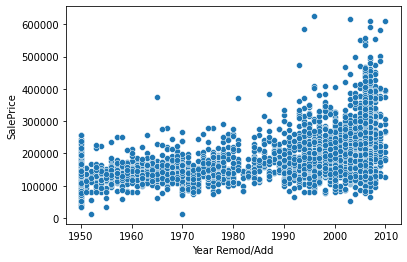

In [ ]:
sns.scatterplot(x=dataset['Year Remod/Add'], y=dataset['SalePrice']);

###Most Expensive and Low-Priced Neighborhood

The graph below shows that "NridgHt","StoneBr" and "NoRidge" are one of the most expensive neighborhoods in Ames. On the other hand, "MeadowV", "IDOTRR" and "BrDale" are the one of the low-priced neighborhoods.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


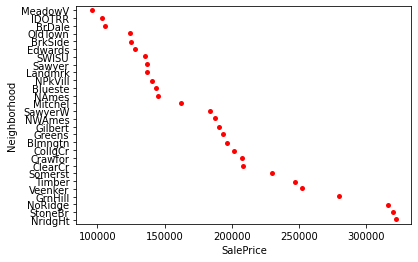

In [ ]:
dataset = pd.concat(
    [
        dataset.groupby('Neighborhood').mean()['SalePrice'],
        dataset.groupby('Neighborhood').count()['PID']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(dataset.sort_values(by='SalePrice').SalePrice, dataset.sort_values(by='SalePrice').index, orient='h', color='red');

###Effect of Overall Quality on Sale Price in Each Neighborhood

In the below graphs, we have created scatter plots between "Overall Qual" and "Sale Price" to check the relationship between these two variables in each of the neighborhoods.

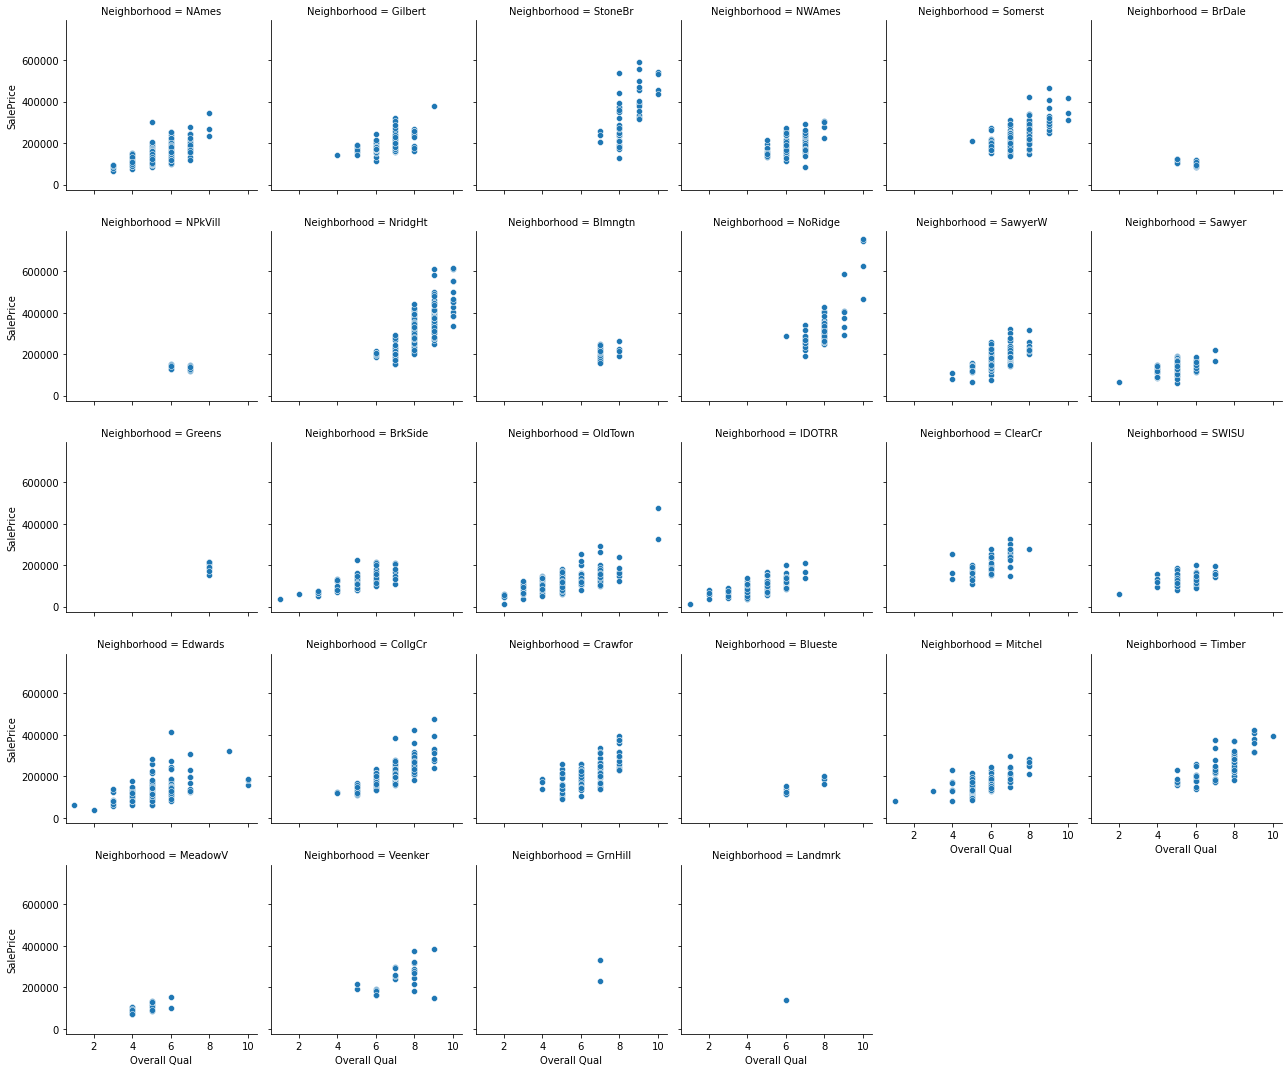

In [ ]:
neighborhood_qual = sns.FacetGrid(data=dataset, col='Neighborhood', col_wrap=6)
neighborhood_qual.map(sns.scatterplot, 'Overall Qual', 'SalePrice');

###In which months were most houses sold?

The trend shows that most of the houses were sold during the summers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


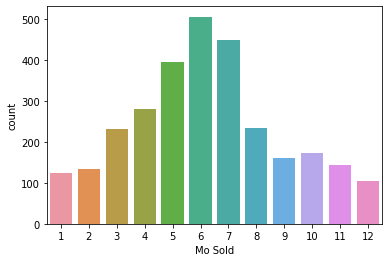

In [ ]:
sns.countplot(dataset['Mo Sold']);

###Were houses in Ames centrally air conditioned?

The graph below shows that most of the houses in the city of Ames are centrally air conditioned.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


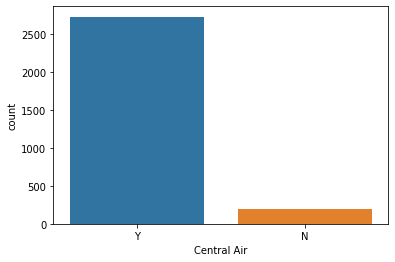

In [ ]:
sns.countplot(dataset['Central Air']);